In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
file = 'BTC.csv'
data = pd.read_csv(file, parse_dates=['time'], index_col="time",low_memory = False)
data['time'] = data.index

In [14]:
print("There are {:,} trades".format(data.shape[0]))

There are 2,169,450 trades


In [13]:
print("There are {:,} orders".format(data.order_id.nunique()))

There are 723,880 orders


In [3]:
#main goal is to figure out the different types of order, precisely we have to classify order as flashed order, and normal order.(So a Binary Classifier)
#first of all figure out all the essential features
 # plot the correlation matrix
 # try making new features, check their correlation
 # anyways random forest tree has a method which will return the most important featrues
#make a column transformer to encode/convert the categorical columns 
#make a pipeline for transforming the columns, then scaling it
#make a stratified test split, count the number of total events, stratify based on the distribution of different events.
#train and a fit a model on the train data,

In [4]:
data.head()

,client_oid,funds,maker_order_id,order_id,order_type,price,product_id,reason,remaining_size,sequence,side,size,taker_order_id,trade_id,type,bid,ask,time
time,,,,,,,,,,,,,,,,,,
2017-07-21 08:52:06.163,150051ad-336a-4429-a1f7-e8e6c07a30fb,NaN,NaN,6fdae78f-f00f-4dee-95f2-0ffb6ca2dfb4,limit,2715.35,BTC-USD,NaN,NaN,3649404788,buy,0.089439,NaN,NaN,received,2715.35,NaN,2017-07-21 08:52:06.163
2017-07-21 08:52:06.163,NaN,NaN,NaN,6fdae78f-f00f-4dee-95f2-0ffb6ca2dfb4,NaN,2715.35,BTC-USD,NaN,0.089439,3649404789,buy,NaN,NaN,NaN,open,2715.35,NaN,2017-07-21 08:52:06.163
2017-07-21 08:52:06.165,NaN,NaN,NaN,a7d073fb-c741-4f87-8a43-699462e597a4,NaN,2708.71,BTC-USD,canceled,0.200000,3649404790,buy,NaN,NaN,NaN,done,2715.35,NaN,2017-07-21 08:52:06.165
2017-07-21 08:52:06.167,NaN,NaN,NaN,5936f368-9b87-477e-9adc-83f14a525491,NaN,2708.66,BTC-USD,canceled,0.500000,3649404791,buy,NaN,NaN,NaN,done,2715.35,NaN,2017-07-21 08:52:06.167
2017-07-21 08:52:06.168,NaN,NaN,NaN,71dbb9bf-8a6c-4c0b-8ca2-259d16be43e1,NaN,2708.71,BTC-USD,canceled,0.200000,3649404792,buy,NaN,NaN,NaN,done,2715.35,NaN,2017-07-21 08:52:06.168


In [5]:
unimp = ['client_oid', 'maker_order_id', 'product_id', 'sequence', 'taker_order_id', 'trade_id',]
filtered_data = data.drop(columns=unimp)
filtered_data.head()

,funds,order_id,order_type,price,reason,remaining_size,side,size,type,bid,ask,time
time,,,,,,,,,,,,
2017-07-21 08:52:06.163,NaN,6fdae78f-f00f-4dee-95f2-0ffb6ca2dfb4,limit,2715.35,NaN,NaN,buy,0.089439,received,2715.35,NaN,2017-07-21 08:52:06.163
2017-07-21 08:52:06.163,NaN,6fdae78f-f00f-4dee-95f2-0ffb6ca2dfb4,NaN,2715.35,NaN,0.089439,buy,NaN,open,2715.35,NaN,2017-07-21 08:52:06.163
2017-07-21 08:52:06.165,NaN,a7d073fb-c741-4f87-8a43-699462e597a4,NaN,2708.71,canceled,0.200000,buy,NaN,done,2715.35,NaN,2017-07-21 08:52:06.165
2017-07-21 08:52:06.167,NaN,5936f368-9b87-477e-9adc-83f14a525491,NaN,2708.66,canceled,0.500000,buy,NaN,done,2715.35,NaN,2017-07-21 08:52:06.167
2017-07-21 08:52:06.168,NaN,71dbb9bf-8a6c-4c0b-8ca2-259d16be43e1,NaN,2708.71,canceled,0.200000,buy,NaN,done,2715.35,NaN,2017-07-21 08:52:06.168


In [6]:
filtered_data.describe()

,funds,price,remaining_size,size,bid,ask,time
count,967.000000,2.167244e+06,1.440404e+06,7.286020e+05,2.169450e+06,2.169409e+06,2169450
mean,2656.498030,5.081508e+03,1.882042e+00,1.869630e+00,2.740434e+03,2.741192e+03,2017-07-21 11:08:14.238925568
min,0.079781,1.000000e-02,0.000000e+00,2.800000e-07,2.690000e+03,2.690060e+03,2017-07-21 08:52:06.163000
25%,143.623360,2.717080e+03,2.000000e-01,2.000000e-01,2.722200e+03,2.722210e+03,2017-07-21 09:54:41.584999936
50%,629.372023,2.738650e+03,4.277875e-01,4.239567e-01,2.738010e+03,2.738990e+03,2017-07-21 11:08:48.118500096
75%,2694.905044,2.764370e+03,1.020000e+00,1.013898e+00,2.764810e+03,2.764820e+03,2017-07-21 12:16:57.412499968
max,80046.384036,1.011515e+08,2.500000e+02,2.500000e+02,2.797270e+03,2.799800e+03,2017-07-21 13:38:22.846000
std,5818.603427,3.871528e+05,4.542107e+00,4.537349e+00,2.728840e+01,2.736245e+01,NaN


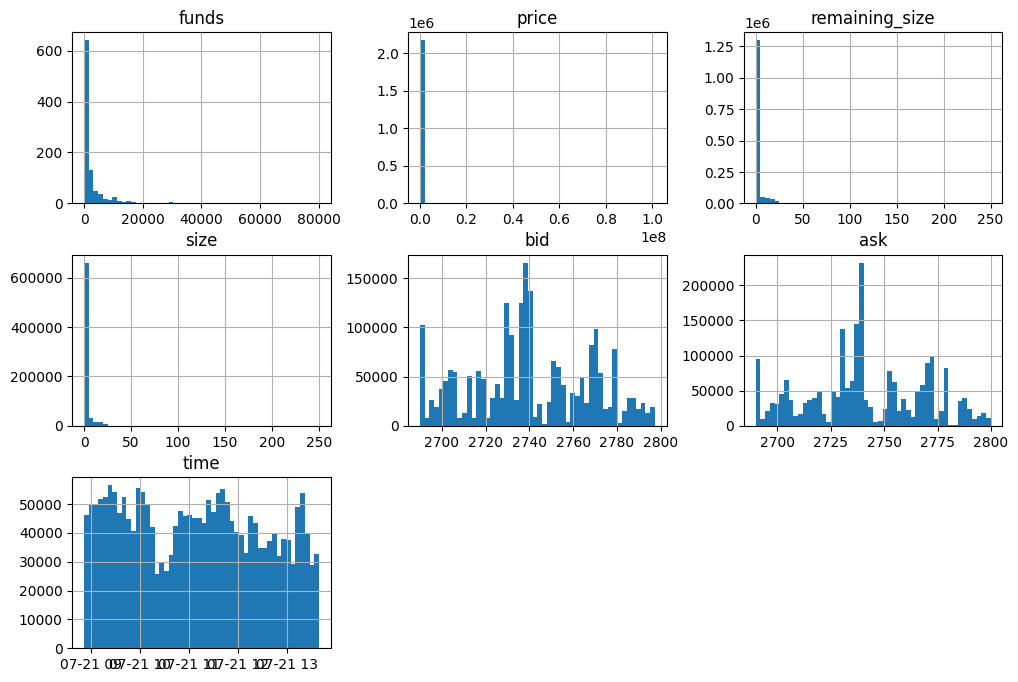

In [8]:
filtered_data.hist(bins=50, figsize=(12,8))
#looking at the distributions there are multimodal graphs, and we often need to scale it so that the ML model could interpret it better.
#But we are using RandomForestClassifier so there is literally no need of scaling and transforming.
plt.show()

In [19]:
canceled_orders = filtered_data[(filtered_data['type']== 'done') & (filtered_data['reason'] == 'canceled')]

matched_orders = filtered_data[filtered_data['type']=='match']['order_id']

flashed_orders = canceled_orders[(~canceled_orders['order_id'].isin(matched_orders)) & (canceled_orders['remaining_size'] > 0) ]
print(f'There are {len(flashed_orders)} flashed orders')

There are 714648 flashed orders


In [20]:
# Get the order_ids of open orders
open_order_ids = filtered_data[filtered_data['type'] == 'open']['order_id']
# Filter the data to include only the open orders
open_orders_data = filtered_data[filtered_data['order_id'].isin(open_order_ids)]

# Get the resting orders
resting_orders = open_orders_data[(open_orders_data['type'] == 'open') | 
                                  ((open_orders_data['type'] == 'match') & (open_orders_data['remaining_size'] > 0))]

print(f"There are {len(resting_orders)} resting orders" ) 

There are 718925 resting orders


In [28]:
filtered_data.loc[filtered_data['order_id'].isin(flashed_orders['order_id']), 'type'] = 'flashed_order'
filtered_data.loc[~filtered_data['order_id'].isin(flashed_orders['order_id']), 'type'] = 'resting_order'

The total number of orders with type == 'flashed_order': 2139865
The total number of orders with type == 'resting_order': 29585


<Axes: >

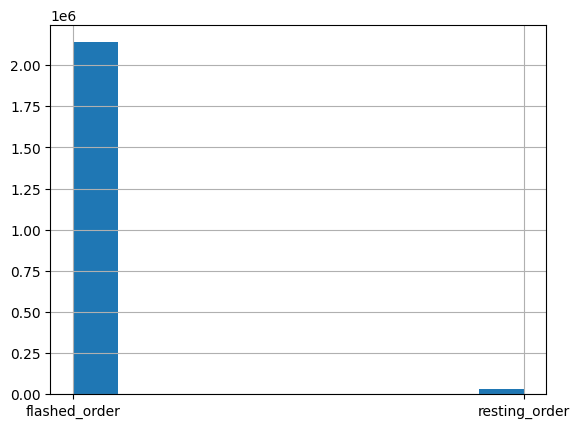

In [30]:
# Total number of orders with type == 'done'
print(f"The total number of orders with type == 'flashed_order': {len(filtered_data[filtered_data['type'] == 'flashed_order'])}")

# Total number of orders with type == 'match'
print(f"The total number of orders with type == 'resting_order': {len(filtered_data[filtered_data['type'] == 'resting_order'])}")

filtered_data['type'].hist()

In [46]:

def compute_avg_lifecycle(filtered_data: pd.DataFrame, n: int = 10):
    # Step 1: Select random order IDs that have both 'received' and 'done' events
    valid_order_ids = filtered_data.groupby('order_id').filter(
        lambda x: ('received' in x['type'].values) and ('done' in x['type'].values)
    )['order_id'].unique()
    
    if len(valid_order_ids) < n:
        print(f"Warning: Only {len(valid_order_ids)} valid order IDs found. Using all of them.")
    
    random_order_ids = np.random.choice(valid_order_ids, size=min(n, len(valid_order_ids)), replace=False)
    
    # Step 2: Filter events associated with these order IDs
    events_associated = filtered_data[filtered_data['order_id'].isin(random_order_ids)]
    
    # Step 3: Compute lifecycle
    def compute_lifecycle(group):
        received_time = group[group['type'] == 'received']['time'].min()
        done_time = group[group['type'] == 'done']['time'].max()
        return (done_time - received_time).total_seconds()

    lifecycles = events_associated.groupby('order_id').apply(compute_lifecycle)
    
    return lifecycles.mean(), lifecycles

# Usage
avg_lifecycle, individual_lifecycles = compute_avg_lifecycle(filtered_data)
print(f"Average lifecycle: {avg_lifecycle:.2f} seconds")
print("Individual lifecycles:")
print(individual_lifecycles)

TypeError: unsupported format string passed to Series.__format__

In [26]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
filtered_data, test_size=0.2, stratify=filtered_data["type"],
random_state=42)

In [27]:
strat_test_set['type'].value_counts()/len(strat_test_set)

type
flashed_order    0.986363
normal_order     0.013637
Name: count, dtype: float64

In [ ]:
#convert catoegotical varibales as we are using an ensemble
#make the code to find the best market mid price, cumulative volume at those price
#levels, then after that I can make an ensemble since this is a binary classification we 
#will have random forest, then SVM and logistic regression? would that work nopes maybe
